# Introduction à R - Exercice

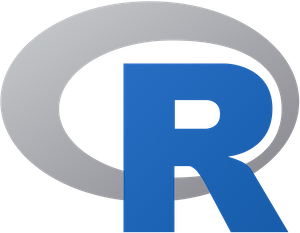

Ces deux exercices mettront en œuvre les concepts de base de R abordés durant le cours aujourd'hui dans un contexte d'analyse de données biologiques.

---

## Exercice 1 : Analyse de séquences ADN

On imagine un tableau de données contenant des séquences hypothétiques de gènes appartenant à trois organismes distinct (souris, rat et humain) :

In [1]:
# Création des données initiales
sequences <- data.frame(
  ID = paste0("seq", 1:10),
  Sequence = c(
    "ATGCTAGCTAGTCATATCGATCGATGAGTCTAGAAGTTCGGATGACTCGTAGAATTATGC",
    "GCGCGTATATATATAGCATAGATGCCTGAAGCGTGCCGTATAAGCTATGAGTCAATAATAC",
    "CGTACGTACGTACGCGATAATCGCGTAGAGTCCTCTTAGAAGATCTCTGAAATTGCCGCT",
    "AAATTTGGGCCATAAGACTCTGAAGATAGCCTTTGGCCCGCAACGAAGTCTCCCTCGAAGTAC",
    "TAGCTAGCTAGCATTAGAGTCCTGAAGATAAGTCTAAGCGCCGATATAGCGCGGCGTAATAG",
    "GATCCGCGCAACGTGGTCAACTGGCTAAGCTATAAGCCTTGAATCCGTAATGCATATAGCCCT",
    "CGCGTACGATAGATAAGAATCCGCCTAGAAATGAGAGAAGCTCCTGATAAGACTCTGAAAT",
    "TATATCGATCGACCTGCATAGACCTCGCTAGAAATATCTCTGCCTAGAGATGCCCTAAGAA",
    "AGGCTAGCTAACTGACTGGTAGACTCCGCTGAATACTGACCCAGTCCGCGAAGAGATAT",
    "TTCGATGCTAGCCTCGAATAGCTAGAAGAATAGCCCTCCGATAGTCGATAGACTAGACTA"
  ),
  Source = c("Humain", "Souris", "Rat", "Humain", "Souris", "Rat", "Humain", "Souris", "Rat", "Humain"),
  Gene = c("BRCA1", "TP53", "EGFR", "KRAS", "BRAF", "MYC", "PTEN", "RB1", "ALK", "HER2")
)

# Aperçu des premières lignes du tableau de données
head(sequences)

,ID,Sequence,Source,Gene
,<chr>,<chr>,<chr>,<chr>
1,seq1,ATGCTAGCTAGTCATATCGATCGATGAGTCTAGAAGTTCGGATGACTCGTAGAATTATGC,Humain,BRCA1
2,seq2,GCGCGTATATATATAGCATAGATGCCTGAAGCGTGCCGTATAAGCTATGAGTCAATAATAC,Souris,TP53
3,seq3,CGTACGTACGTACGCGATAATCGCGTAGAGTCCTCTTAGAAGATCTCTGAAATTGCCGCT,Rat,EGFR
4,seq4,AAATTTGGGCCATAAGACTCTGAAGATAGCCTTTGGCCCGCAACGAAGTCTCCCTCGAAGTAC,Humain,KRAS
5,seq5,TAGCTAGCTAGCATTAGAGTCCTGAAGATAAGTCTAAGCGCCGATATAGCGCGGCGTAATAG,Souris,BRAF
6,seq6,GATCCGCGCAACGTGGTCAACTGGCTAAGCTATAAGCCTTGAATCCGTAATGCATATAGCCCT,Rat,MYC


In [2]:
# 1. Vérifiez la longueur de la première séquence du tableau
nchar(sequences$Sequence[1])

[1] 60

<details> <summary>Indice Q1</summary>
On peut compter le nombre de caractères d'une chaîne de caractères avec la fonction <code>nchar()</code>
</details>

In [3]:
# 2. Créez une variable numérique "seuil" de valeur 60
seuil <- 60

# 3. Identifiez toutes les séquences plus longues que le "seuil"
sequences_longues <- subset(sequences, nchar(sequences$Sequence) > seuil)
print("Séquences plus longues que le seuil :")
print(sequences_longues$ID)

[1] "Séquences plus longues que le seuil :"
[1] "seq2" "seq4" "seq5" "seq6" "seq7" "seq8"


<details> <summary>Indice Q3</summary>
Ici, on peut utiliser la fonction <code>subset()</code>
</details>

In [4]:
# 4. Déterminez la longueur moyenne des séquences
longueur_moyenne <- mean(nchar(sequences$Sequence))
print(paste("Longueur moyenne des séquences:", longueur_moyenne))

[1] "Longueur moyenne des séquences: 61"


In [5]:
# 5. Créez un sous-ensemble des séquences humaines
sequences_humaines <- subset(sequences, Source == "Humain")
print("Séquences humaines:")
print(sequences_humaines)

[1] "Séquences humaines:"
      ID                                                        Sequence Source
1   seq1    ATGCTAGCTAGTCATATCGATCGATGAGTCTAGAAGTTCGGATGACTCGTAGAATTATGC Humain
4   seq4 AAATTTGGGCCATAAGACTCTGAAGATAGCCTTTGGCCCGCAACGAAGTCTCCCTCGAAGTAC Humain
7   seq7   CGCGTACGATAGATAAGAATCCGCCTAGAAATGAGAGAAGCTCCTGATAAGACTCTGAAAT Humain
10 seq10    TTCGATGCTAGCCTCGAATAGCTAGAAGAATAGCCCTCCGATAGTCGATAGACTAGACTA Humain
    Gene
1  BRCA1
4   KRAS
7   PTEN
10  HER2


In [6]:
# 6. Déterminez le nombre de séquences par source
nb_par_source <- table(sequences$Source)
print("Nombre de séquences par source :")
print(nb_par_source)

[1] "Nombre de séquences par source :"

Humain    Rat Souris 
     4      3      3 


<details> <summary>Indice Q6</summary>
On peut former un tableau de contingence avec la fonction <code>table()</code>
</details>

In [7]:
# 7. Écrivez une fonction pour extraire les nucléotides d'une séquence
extraire_nucleotides <- function(sequence) {
  return(table(unlist(strsplit(sequence, ""))))
}

# Testez la fonction
extraire_nucleotides('ACTGCTAATCGTTCAATC')


A C G T 
5 5 2 6 

In [8]:
# 8. Écrivez une fonction pour calculer la fréquence de nucléotide d'une séquence
freq_nucleotides <- function(sequence) {
  return(table(unlist(strsplit(sequence, ""))) / nchar(sequence))
}

# Testez la fonction
freq_nucleotides('ACTGCTAATCGTTCAATC')


        A         C         G         T 
0.2777778 0.2777778 0.1111111 0.3333333 

La fonction <code>lapply</code> applique une fonction à chaque élément d'une liste (ou d'un vecteur). Le résultat est donné sous la forme d'une liste.

In [9]:
# 9. Ajoutez une colonne avec les fréquences des nucléotides au tableau
sequences$Frequences <- lapply(sequences$Sequence, freq_nucleotides)

# Aperçu du résultat
head(sequences, 3)

,ID,Sequence,Source,Gene,Frequences
,<chr>,<chr>,<chr>,<chr>,<list>
1,seq1,ATGCTAGCTAGTCATATCGATCGATGAGTCTAGAAGTTCGGATGACTCGTAGAATTATGC,Humain,BRCA1,"0.2833333, 0.1666667, 0.2500000, 0.3000000"
2,seq2,GCGCGTATATATATAGCATAGATGCCTGAAGCGTGCCGTATAAGCTATGAGTCAATAATAC,Souris,TP53,"0.3278689, 0.1803279, 0.2295082, 0.2622951"
3,seq3,CGTACGTACGTACGCGATAATCGCGTAGAGTCCTCTTAGAAGATCTCTGAAATTGCCGCT,Rat,EGFR,"0.2500000, 0.2500000, 0.2333333, 0.2666667"


In [10]:
# 10. En réutilisant la fonction de la question 7, calculez le taux de GC de chaque séquence
calcul_gc <- function(sequence) {
  nucleotides <- extraire_nucleotides(sequence)
  taux_gc <- (sum(nucleotides[c("G", "C")]) / sum(nucleotides)) * 100
  return(taux_gc)
}

# Testez la fonction
calcul_gc('ACTGCTAATCGTTCAATC')

[1] 38.88889

La fonction <code>sapply</code> applique une fonction à chaque élément d'une liste (ou d'un vecteur) comme <code>lapply</code>. Cependant, le résultat est donné sous la forme d'un vecteur, ce qui permet d'obtenir des types d'objets plus aptes aux calculs.

In [11]:
# 11. Ajoutez une colonne avec les taux de GC au tableau
sequences$TauxGC <- sapply(sequences$Sequence, calcul_gc)

# Aperçu du résultat
head(sequences, 3)

,ID,Sequence,Source,Gene,Frequences,TauxGC
,<chr>,<chr>,<chr>,<chr>,<list>,<dbl>
1,seq1,ATGCTAGCTAGTCATATCGATCGATGAGTCTAGAAGTTCGGATGACTCGTAGAATTATGC,Humain,BRCA1,"0.2833333, 0.1666667, 0.2500000, 0.3000000",41.66667
2,seq2,GCGCGTATATATATAGCATAGATGCCTGAAGCGTGCCGTATAAGCTATGAGTCAATAATAC,Souris,TP53,"0.3278689, 0.1803279, 0.2295082, 0.2622951",40.98361
3,seq3,CGTACGTACGTACGCGATAATCGCGTAGAGTCCTCTTAGAAGATCTCTGAAATTGCCGCT,Rat,EGFR,"0.2500000, 0.2500000, 0.2333333, 0.2666667",48.33333


In [12]:
# 12. Identifiez les séquences avec un taux de GC élevé
sequences_gc_haut <- subset(sequences, TauxGC > 45)
print("Séquences avec un %GC > 45 :")
print(sequences_gc_haut$ID)

[1] "Séquences avec un %GC > 45 :"
[1] "seq3" "seq4" "seq5" "seq6" "seq9"


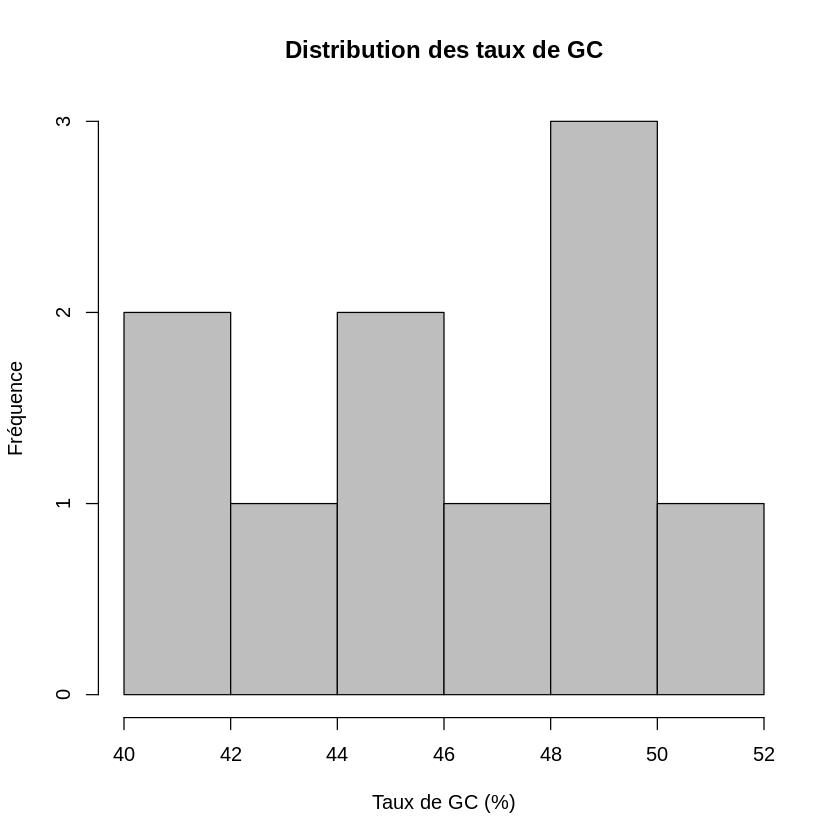

In [13]:
# 13. Visualisez le taux de GC des séquences à l'aide d'un histogramme
hist(sequences$TauxGC,
     main = "Distribution des taux de GC",
     xlab = "Taux de GC (%)",
     ylab = "Fréquence",
     col = "grey")

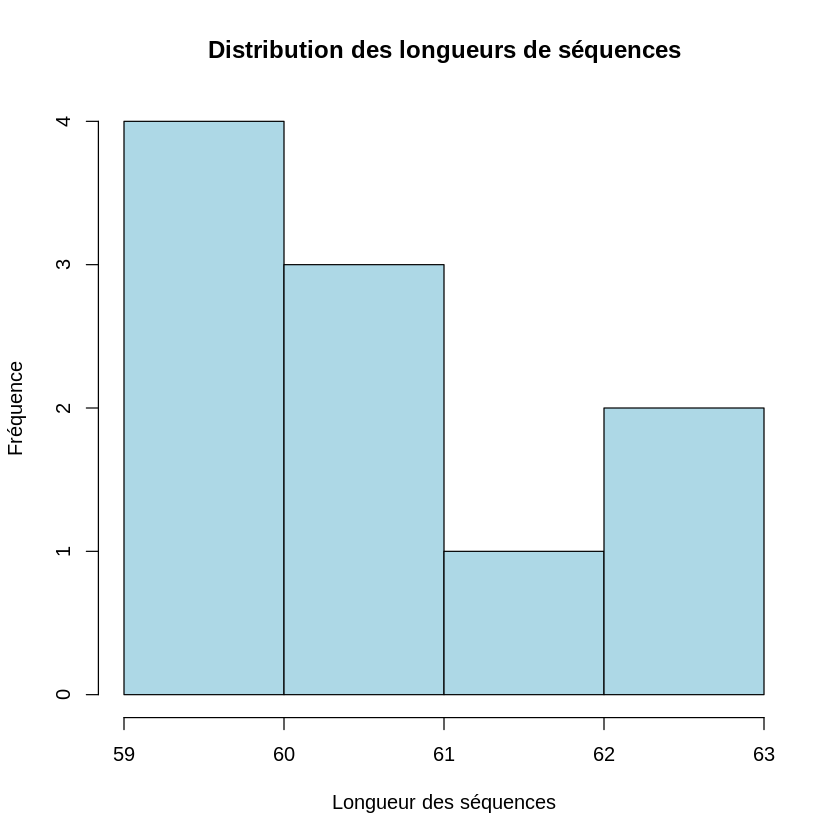

In [14]:
# 14. Visualisez les longueurs des séquences à l'aide d'un histogramme
hist(nchar(sequences$Sequence),
     main = "Distribution des longueurs de séquences",
     xlab = "Longueur des séquences",
     ylab = "Fréquence",
     col = "lightblue")

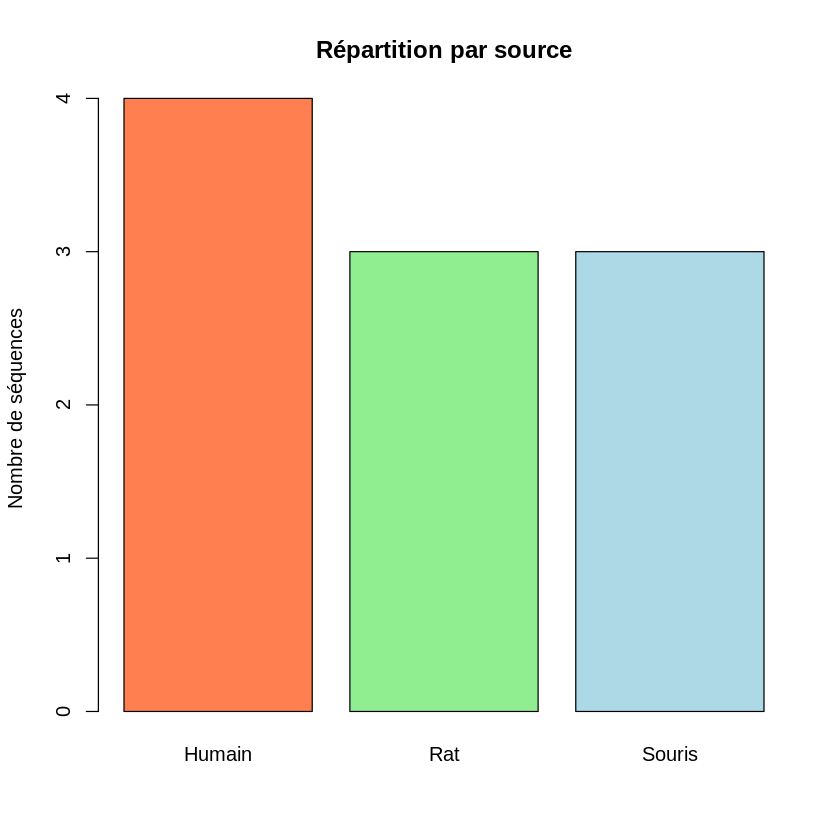

In [15]:
# 15. Visualisez le nombre de séquences par source à l'aide d'un diagramme à barres
barplot(table(sequences$Source),
        main = "Répartition par source",
        col = c("coral", "lightgreen", "lightblue"),
        ylab = "Nombre de séquences")

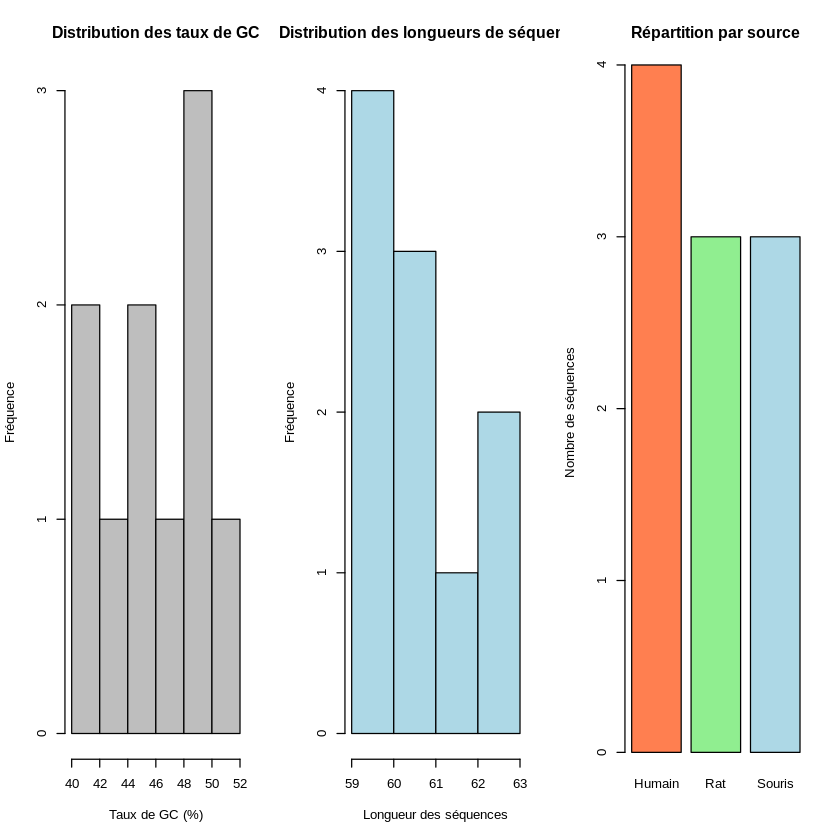

In [16]:
# 16. Combinez les diagrammes pour une visualisation finale
par(mfrow = c(1, 3))  # Création d'une grille de 1x3 pour les diagrammes

# Taux de GC
hist(sequences$TauxGC,
     main = "Distribution des taux de GC",
     xlab = "Taux de GC (%)",
     ylab = "Fréquence",
     col = "grey")

# Longueurs des séquences
hist(nchar(sequences$Sequence),
     main = "Distribution des longueurs de séquences",
     xlab = "Longueur des séquences",
     ylab = "Fréquence",
     col = "lightblue")

# Nombre de séquences par source
barplot(table(sequences$Source),
        main = "Répartition par source",
        col = c("coral", "lightgreen", "lightblue"),
        ylab = "Nombre de séquences")

par(mfrow = c(1, 1))  # Retour à la configuration normale

---

# Exercice 2 : Analyse de données d'expression génique

Cet exercice consiste à analyser des données d'expression génétique issues d'un tableau contenant les niveaux d'expression de plusieurs gènes dans deux conditions : **contrôle** (correspondant à un état sain) et **traitement** (correspondant à un état malade).

Ce type d'analyse est essentiel pour comprendre les mécanismes moléculaires impliqués dans des maladies et identifier des cibles potentielles pour des thérapies ou des diagnostics.

L'objectif est d'identifier les gènes différenciellement exprimés :
* Soit des gènes **surexprimés** par rapport à la normal.
* Ou des gènes **sous-exprimés** par rapport à la normal.

## 1. Lecture des données

Nous commençons par lire les données d'expression génétique à partir d'un fichier contenant des données fictives.

In [17]:
# Importation de module
library(dplyr)

# Lecture des données
expression_data <- read.csv(text = "
gene_id,controle_1,controle_2,controle_3,traitement_1,traitement_2,traitement_3
ENSG00000000001,1245,1398,1156,2356,2289,2198
ENSG00000000002,89,102,95,45,52,48
ENSG00000000003,5467,5889,5234,5544,5788,5322
ENSG00000000004,2341,2156,2289,1123,998,1056
ENSG00000000005,778,845,812,1567,1623,1489
ENSG00000000006,3421,3289,3544,3567,3445,3398
ENSG00000000007,92,88,95,267,289,245
ENSG00000000008,4532,4398,4267,2245,2398,2178
ENSG00000000009,1567,1489,1534,1489,1523,1478
ENSG00000000010,2289,2354,2198,4532,4398,4289
")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##2. Calcul des Moyennes et des Écarts-types
Nous commençons par calculer les moyennes et écarts-types des groupes contrôle et traitement pour chaque gène (en sachant que les écarts-types montrent la dispersion des données autour de la moyenne).

Quels gènes semblent-être :
* Surexprimés dans le groupe traitement par rapport au groupe contrôle ?
* Sous-exprimés dans le groupe traitement par rapport au groupe contrôle ?
* Sans différence d'expression flagrante ?

Qu'en est-il des écarts-types ?

In [18]:
# Calcul des moyennes et écarts-types
expression_data$controle_mean <- rowMeans(expression_data[, c("controle_1", "controle_2", "controle_3")])
expression_data$controle_sd <- apply(expression_data[, c("controle_1", "controle_2", "controle_3")], 1, sd)
expression_data$traitement_mean <- rowMeans(expression_data[, c("traitement_1", "traitement_2", "traitement_3")])
expression_data$traitement_sd <- apply(expression_data[, c("traitement_1", "traitement_2", "traitement_3")], 1, sd)

# Aperçu des résultats
expression_data[, c("gene_id", "controle_mean", "controle_sd", "traitement_mean", "traitement_sd")]

gene_id,controle_mean,controle_sd,traitement_mean,traitement_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000001,1266.33333,122.402342,2281.00000,79.303216
ENSG00000000002,95.33333,6.506407,48.33333,3.511885
ENSG00000000003,5530.00000,332.013554,5551.33333,233.086536
ENSG00000000004,2262.00000,95.409643,1059.00000,62.553977
ENSG00000000005,811.66667,33.501244,1559.66667,67.300322
ENSG00000000006,3418.00000,127.526468,3470.00000,87.229582
ENSG00000000007,91.66667,3.511885,267.00000,22.000000
ENSG00000000008,4399.00000,132.502830,2273.66667,112.766721
ENSG00000000009,1530.00000,39.153544,1496.66667,23.459184


<details> <summary>Réponse - Surexpression apparente :</summary>

Les gènes ENSG00000000001, ENSG00000000005, ENSG00000000007, et ENSG00000000010 montrent des augmentations significatives de leurs moyennes d'expression dans le groupe traitement par rapport au groupe contrôle.
* Par exemple, ENSG00000000001 passe d'une moyenne de 1266 (contrôle) à 2281 (traitement).

</details>

---

<details> <summary>Réponse - Sous-expression apparente :</summary>

Les gènes ENSG00000000002, ENSG00000000004, et ENSG00000000008 montrent une baisse importante d'expression dans le groupe traitement.
* Par exemple, ENSG00000000004 passe d'une moyenne de 2262 (contrôle) à 1059 (traitement).

</details>

---

<details> <summary>Réponse - Stabilité d'expression :</summary>

Certains gènes, comme ENSG00000000003, ENSG00000000006, et ENSG00000000009, présentent des moyennes d'expression similaires dans les deux groupes.

</details>

---

<details> <summary>Réponse - Variabilité des écarts-types :</summary>

Les écarts-types montrent la dispersion des données autour de la moyenne.
Par exemple, ENSG00000000007 présente une faible variabilité dans le contrôle (3.51) mais une variabilité plus importante dans le traitement (22.00), indiquant des différences plus marquées entre les échantillons.
</details>


## 3. Normalisation

Nous appliquons une **transformation logarithmique en base 2** aux données d'expression car elle permet de réduire l'écart entre les petites et grandes valeurs et stabiliser les variations.

De plus, les résultats deviennent plus simples à interpréter : une augmentation de +1 signifie que l'expression **a doublé**, et une diminution de -1 signifie qu'elle **a été divisée par deux**.

In [19]:
# Normalisation
expression_data_log2 <- log2(expression_data[, 2:7]) # On sélectionne que les colonnes contrôle/traitement

# Aperçu des résultats
expression_data_log2

controle_1,controle_2,controle_3,traitement_1,traitement_2,traitement_3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.281930,10.449149,10.174926,11.202124,11.160502,11.101976
6.475733,6.672425,6.569856,5.491853,5.700440,5.584963
12.416534,12.523807,12.353698,12.436712,12.498849,12.377753
11.192909,11.074141,11.160502,10.133142,9.962896,10.044394
9.603626,9.722808,9.665336,10.613789,10.664447,10.540128
11.740202,11.683433,11.791163,11.800496,11.750288,11.730470
6.523562,6.459432,6.569856,8.060696,8.174926,7.936638
12.145932,12.102632,12.059006,11.132500,11.227616,11.088788
10.613789,10.540128,10.583083,10.540128,10.572700,10.529431


## 4. Calcul du fold change et du Log2 Fold Change

Le **fold change (FC)** est mesure combien l'expression d'un gène varie entre deux conditions (groupe contrôle et groupe traitement). Il est obtenu en calculant le ratio entre la moyenne des valeurs d'expression dans le groupe traitement et celle dans le groupe contrôle.

→ Un fold change de 2 signifie que l'expression a doublé, tandis qu'un fold change de 0.5 indique qu'elle a été divisée par deux.

Le **log2 fold change (log2FC)** est une transformation logarithmique (en base 2) du fold change. Cette normalisation rend les résultats plus intuitifs :
* Une valeur positive (ex: +1) indique une surexpression (l'expression est doublée).
* Une valeur négative (ex: -1) indique une sous-expression (l'expression est divisée par deux).
* Une valeur proche de 0 indique une absence de changement significatif.

In [20]:
# Calcul du fold change
expression_data$FC <- expression_data$traitement_mean / expression_data$controle_mean

# Calcul du log2 fold change
expression_data$log2FC <- log2(expression_data$FC)

# Aperçu des résultats
expression_data[c("gene_id", "FC", "log2FC")]

gene_id,FC,log2FC
<chr>,<dbl>,<dbl>
ENSG00000000001,1.8012635,0.849009235
ENSG00000000002,0.5069930,-0.979962247
ENSG00000000003,1.0038577,0.005554843
ENSG00000000004,0.4681698,-1.094896340
ENSG00000000005,1.9215606,0.942278456
ENSG00000000006,1.0152136,0.021783266
ENSG00000000007,2.9127273,1.542370624
ENSG00000000008,0.5168599,-0.952154839
ENSG00000000009,0.9782135,-0.031778709


## 5. Classification des gènes

Les gènes sont classés selon leur log2 Fold Change pour déterminer s'ils sont surexprimés, sous-exprimés, ou non différenciés. Nous pouvons décider nous-même du seuil démarquant un gène à l'expression inchangé d'un gène surexprimé ou sous-exprimé. Ici, on choisit 0,9.

La fonction <code>case_when</code> de la bibliothèque <code>dplyr</code> facilite la distinction entre les trois cas.

In [21]:
# Classification des gènes
expression_data$Expression_Statut <- case_when(
  expression_data$log2FC > .9 ~ "Surexprimé",
  expression_data$log2FC < -.9 ~ "Sous-exprimé",
  TRUE ~ "Non différentiel"
)

# Aperçu
expression_data[c("gene_id", "Expression_Statut")]

gene_id,Expression_Statut
<chr>,<chr>
ENSG00000000001,Non différentiel
ENSG00000000002,Sous-exprimé
ENSG00000000003,Non différentiel
ENSG00000000004,Sous-exprimé
ENSG00000000005,Surexprimé
ENSG00000000006,Non différentiel
ENSG00000000007,Surexprimé
ENSG00000000008,Sous-exprimé
ENSG00000000009,Non différentiel


## 6. Résumé du nombre de gènes par catégorie

On peut maintenant compter le nombre de gènes dans chaque catégorie d'expression.

In [22]:
# Résumé du nombre de gènes par catégorie
résumé_expression <- table(expression_data$Expression_Statut)
print("Nombre de gènes par catégorie :")
print(résumé_expression)


[1] "Nombre de gènes par catégorie :"

Non différentiel     Sous-exprimé       Surexprimé 
               4                3                3 


## 7. Statistiques descriptives

On peut maintenant générer des statistiques descriptives pour chaque niveau d'expression. Qu'est-ce qu'on remarque ici ?

In [23]:
# Statistiques descriptives par groupe
expression_stats <- aggregate(
  cbind(controle_mean, traitement_mean, log2FC) ~ Expression_Statut,
  data = expression_data,
  FUN = function(x) c(mean = mean(x), sd = sd(x))
)
print("Statistiques par groupe :")
print(expression_stats)

[1] "Statistiques par groupe :"
  Expression_Statut controle_mean.mean controle_mean.sd traitement_mean.mean
1  Non différentiel           2936.083         1977.017             3199.750
2      Sous-exprimé           2252.111         2151.850             1127.000
3        Surexprimé           1061.222         1115.470             2077.667
  traitement_mean.sd log2FC.mean  log2FC.sd
1           1765.179   0.2111422  0.4258356
2           1114.224  -1.0090045  0.0756728
3           2117.726   1.1449943  0.3441615



<details> <summary>Réponse - Gènes non différentiels :</summary>

* Le log2 fold change moyen est proche de 0 (0.21), confirmant que ces gènes ne sont pas significativement modifiés entre les deux groupes.
* Une grande variabilité (écart-type élevé) est observée dans les valeurs d'expression, indiquant que l'expression de ces gènes diffère grandement et qu'ils sont probablement pas liés entre eux.

</details>

---

<details> <summary>Réponse - Gènes sous-exprimés :</summary>

* Le log2 Fold Change moyen est inférieur à -1 (-1.01), confirmant une sous-expression significative de ces gènes dans le groupe traitement.
* L'écart-type est relativement faible pour le log2 fold change, indiquant une possible homogénéité chez ces gènes.

</details>

---

<details> <summary>Réponse - Gènes surexprimés :</summary>

* Le log2 fold change moyen est supérieur à 1 (1.14), confirmant une surexpression significative.
* Une variabilité importante est observée dans les valeurs d'expression du groupe traitement (écart-type élevé de 2117), ce qui pourrait indiquer une hétérogénéité dans la surexpression de ces gènes.

</details>


# Conclusion

Ces exercices vous auront montré comment R peut être utilisé dans un contexte bioinformatique pour manipuler et visualiser des données biologiques.